# 3D Turbulence Energy Spectra

In [143]:
# Import numpy, and matplotlib
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

This piece of code generates an artificial flow filed which represent the velocity components in a homogeneous and isotropic field.

<AxesSubplot:>

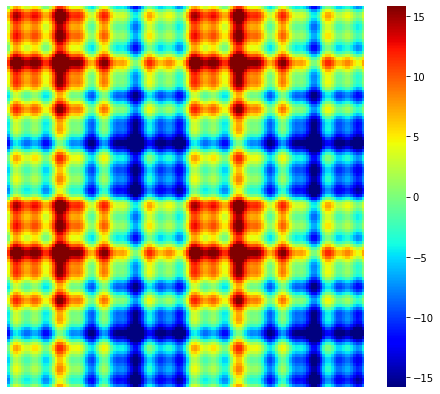

In [154]:
dim=128

#Domian, i.e., x1, x2, x3 are in the range of [0,L]
L=2*np.pi
dx = 2*np.pi/L;

x = np.linspace(0, L, dim+1)
x=x[:-1]
X,Y,Z=np.meshgrid(x,x,x)

# Assume that there are three dominant wave-number with different amplitudes
w1 = 2.0; Aw1 = 6.0;
w2 = 8.0; Aw2 = 4.0;
w3 = 16.0; Aw3 = 3.0;

# Assuming isotropic and homogeneous conditions, the following artificial velocity field is considerd.
u = (Aw1*(np.sin(w1*X)+np.sin(w1*Y)+np.sin(w1*Z))
    + Aw2*(np.sin(w2*X)+np.sin(w2*Y)+np.sin(w2*Z)) 
    + Aw3*(np.sin(w3*X)+np.sin(w3*Y)+np.sin(w3*Z)));
v = u;
w = u;


fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(u[:,:,0], cmap='jet', xticklabels=False, yticklabels=False, robust=True)

Apply fftn to perform discrete Fourier transform in 3 dimension

In [155]:
ufft=np.fft.fftn(u)
vfft=np.fft.fftn(v)
wfft=np.fft.fftn(w)

Euu=(np.abs(ufft)/dim**3)**2
Evv=(np.abs(vfft)/dim**3)**2
Eww=(np.abs(wfft)/dim**3)**2

Now it is time to define scalar $k$ as $(K_i K_i)^{1/2}$ and integrate $E_{ii}$ over a sphere of radius $k$ to obtain $E(k)$. \
$E(k) = \frac{1}{2} \oint E_{ii}(\vec{K}) dS(k)$,\
where $S(k)=4\pi k^2$

In [156]:
# define radius which start from zero, reaches to maximum number of dim/2 then again reduces to zero
ri = np.concatenate((np.array(range(int(dim/2+1))), np.array(range(int(dim/2-1)))-dim/2+1))

rx,ry,rz = np.meshgrid(ri, ri, ri)
r = np.sqrt(rx**2+ry**2+rz**2)*dx

# define 1D wave number
kf = int(dim/2);
k = (np.array(range(kf))+1)*dx

# define bins to discretize k-domian which helps calculating the integral
bins = np.zeros(kf+1)
bins[1:-1] = (k[:-1]+k[1:])/2
bins[-1] = k[-1]

Ek = np.zeros(k.shape[0]);

# find bin indices to which the r values belong
bin_ind = np.digitize(r, bins)
bin_samples = np.zeros(k.shape[0]);

for i in range(kf):
    Ek[i] = np.sum(Euu[bin_ind==i+1])+np.sum(Evv[bin_ind==i+1])+np.sum(Eww[bin_ind==i+1]);
    bin_samples[i] = np.sum(bin_ind==i+1);
Ek = Ek/bin_samples;

# The for-loop calculated the avergae Ek over a sphere of radius k
# Accordingly, it should be multiplied by the area
Ek = Ek*2*np.pi*(k**2)/(dx**3)

Plot the energy spectra, i.e., Ek as a function of k

(0.0, 25.0)

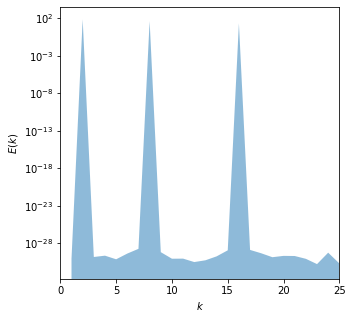

In [158]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.fill_between(k,Ek, alpha=0.5)
#ax.plot(k,Ek)

ax.set_yscale('log')
ax.set_xlabel('$k$')
ax.set_ylabel('$E(k)$')
ax.set_xlim([0,25])

# Calculation of the kinetic energy

The blue area under the curve, $\int_{0}^{\infty} E(k) dk$, is calculated as

In [162]:
blue_area = np.trapz(Ek,k)
print(blue_area)

123.1812731964925


In [164]:
kinetic_energy = 1/2*np.average(u**2+v**2+w**2)
print(kinetic_energy)

137.24999999999983


There is about 11% deviation between $\langle u_{i}^2\rangle$ and $\int_{0}^{\infty} E(k) dk$. The main reason is that the resolution of the wave number (1 $m^{-1}$) is poor. This can be enhanced by increasing the domain size, i.e., $L$ along with the sampling resolution, i.e., dim.